# <center>Assignment 6: Sensible and Latent Heat 

#### Objectives 
The objectives for this lab are:

1. Be able to understand relationships between oceanographic and atmospheric data.

2. Be able to plot sea surface temperature and heat fluxes.
 
3. Use a function to estimate ocean temperature change.

2. Be able to assess the importance of the surface heat fluxes in an ocean temperature budget. 

#### Background

Heat flux, or energy flow, through the ocean surfaces is a critical component of the earth climate system.  It is estimated that ~90% of the heating during the last 50 years has occurred in the ocean (Lindsey and Dahlman, 2020), which highlights the disproportionally large impact of global warming on the world’s oceans. Nearly all of oceanic heating is driven by air-sea interaction that determines the amount of incoming solar energy (warming the upper ocean) and the outgoing heat loss (cooling the ocean).  

The primary processes that lead to heat **loss** through the ocean surface are long-wave radiation (or back radiation), latent heat flux, and sensible heat flux. **Long-wave radiation** results from the fact that anything with a temperature emits electromagnetic radiation as dictated by the Stefan-Boltzmann Law. Since the ocean has a temperature, it emits electromagnetic radiation and releases heat. **Latent heat flux** is an energy exchange controlled by changes in the state of water. Typically, liquid water is evaporated from the ocean surface, becoming water vapor in the atmosphere. This change in state requires a tremendous amount of energy. Consider this like the ocean sweating. Humans sweat to cool down (i.e., water is evaporated off our skin to remove heat from our body), and so does the ocean. **Sensible heat flux** is heat exchange by conduction. Two objects with different temperatures in contact transfer heat from hot to cold. Since the ocean is typically warmer than the atmosphere, heat energy is transferred from the ocean to the atmosphere.  

Making direct measurements of these heat fluxes in the ocean can be very difficult.  Think about how you might measure the amount of water evaporating over a patch of ocean in rough seas?  As such, scientists have developed algorithms to serve as proxies in lieu of direct measurements.  These are called **bulk formulas**. Bulk formulas take environmental properties that are much easier to collect (e.g. wind speed, air temperature, relative humidity, and water temperature) and arrange them in formulas that roughly estimate the processes.  Thus, many data collection platforms in and around the ocean can provide these environmental properties from which heat flux calculations can be made.

---

The bulk formula to estimate the heat fluxes between the ocean and the atmosphere can be summarized by:

<center> Qt = Qin + Qb + Qh + Qe 
</center> 
where

| Term | Definition |
| :-: | :-: |
| Qt | Total Flux |
| Qin | Incoming Solar Radiation |
| Qb | Longwave Back Radiation  |
| Qh | Sensible Heat Flux |
| Qe | Latent Heat Flux |

---

Today, we will attempt to use those bulk formulas to estimate heat fluxes using data from Orange Beach, AL.

We've given many examples of functions and code we've used in the past to do the exercises today. However, for this lab, we have not supplied the function input arguments. Keep that in mind as you're copying and pasting.

Just as before, we would like you to download your work as both an html and ipynb file to submit to Canvas.

---
#### Please acknowledge that you understand the instructions by copying and pasting each of the following into the next cells.

#I understand how to save my progress and reopen the notebook.

#I understand that I am being asked to save and submit copies of my notebook as well as a figure of my choice for the assignment.

#I understand that I need to comment my code.

In [1]:
#I understand how to save my progress and reopen the notebook.


In [2]:
#I understand that I am being asked to save and submit copies of my notebook as well as a figure of my choice for the assignment.

In [3]:
#I understand that I need to comment my code.

## Let's get started!

First, import a couple packages that we will use throughout this assignment

In [4]:
#Import Pandas and alias it as 'pd'
#for manipulating tables and timeseries
import pandas as pd

#Import MatPlotLib and alias it as 'plt'
#for making plots/graphs/figures
import matplotlib.pyplot as plt

#Import Numpy and alias it as 'np'
#for the arrays
import numpy as np

## Exercise 1: Describe the data

This lab will focus on data collected by a NOAA buoy that is just offshore of Orange Beach, AL (Fig. 1). The buoy collects data at 2 meters below the surface, which is approximated as the surface of the water column. The depth of the water column at this location is 26 meters. 

The instrumentation on this buoy collects a range of meteorological parameters including things we need for calculating the latent and sensible heat fluxes. 

You can check out the data in real-time at the NOAA National Buoy Data Center (NBDC) here: https://www.ndbc.noaa.gov/station_page.php?station=42012. 

The incoming solar radiation and outgoing longwave radiation are a bit more difficult to determine, but there are data products that combine any available observations in conjunction with numerical modeling outputs to provide this information at a regional or global scale, e.g. North American Regional Reanalysis (NARR) from National Center for Environmental Prediction (NCEP) (https://psl.noaa.gov/data/gridded/data.narr.html). With the buoy data and the NARR
reanalysis product, we can try to understand aspects of the complex relationship between water
temperature and air-sea interactions.



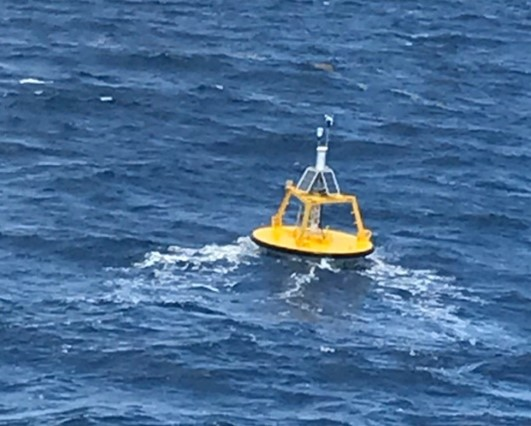
<center>Fig. 1 NOAA Buoy #42012 Orange Beach – 44 nm southeast of Mobile, AL. Image courtesy of NOAA.

In a desktop text editor such as Notepad, open the text file associated with this assignment and answer the following questions:

1. What is the time step of the measurements?

2. List the column names and associated units.

3. What is the duration of the data file? When does it start and when does it end?

In [5]:
##1. 1 hour

##2. Year(YYYY),Month(MM),Day(DDD),Hour(HH),Minute(mm),Water_Temp(oC),Air_Temp(oC)
#Relative_Humidity(%),Atm_Pressure(mb),Wind_Speed(m/s),Solar_radiation(W/m^2)
#Back_Radiation(W/m^2),Sensible_Heat_Flux(W/m^2),Latent_Heat_Flux(W/m^2)

##3. 08/20/2017 to 10/19/2017

## Exercise 2: Read in the data

Upload the text file to your Jupyter home directory.

1. Read in the file using the pd.read_csv(filename, sep=',', engine='python') command we have used in previous labs. 

2. Take a peek at the data to make sure everything looks good. 

In [6]:
filename = "orb_buoy_2017.txt"
df = pd.read_csv(filename, sep=',', engine='python')

In [7]:
df.head()

,Year(YYYY),Month(MM),Day(DDD),Hour(HH),Minute(mm),Water_Temp(oC),Air_Temp(oC),Relative_Humidity(%),Atm_Pressure(mb),Wind_Speed(m/s),Solar_radiation(W/m^2),Back_Radiation(W/m^2),Sensible_Heat_Flux(W/m^2),Latent_Heat_Flux(W/m^2)
0,2017,8,20,0,50,30.7,28.3,80.393,1015.0,2.9409,1.1285,-54.229,-12.070,-100.54
1,2017,8,20,1,50,30.9,28.5,75.286,1014.9,4.1391,2.4826,-53.229,-16.383,-158.77
2,2017,8,20,2,50,30.8,28.6,67.524,1014.7,5.2283,3.8368,-52.229,-18.961,-235.49
3,2017,8,20,3,50,30.9,28.5,73.937,1015.1,4.5748,97.2740,-47.288,-18.075,-181.03
4,2017,8,20,4,50,30.9,28.4,75.725,1015.3,4.3569,209.1300,-41.559,-17.997,-167.09


## Exercise 3: Plot a sea surface temperature (SST) time series

Let's plot the time series of sea surface temperature (SST) at the Orange Beach buoy, which is the water temperature recorded by the buoy. 

#### Convert to datetime
Remember from our previous lab that we will have to combine the date and time columns into a single datetime by creating a new dataframe and using the pd.to_datetime command. 

1. List the columns that we need to combine in order to create the new dataframe of dates and times.

In [8]:
#Year(YYYY), Month(MM), Day(DDD), Hour(HH), Minute(mm)

2. Now create a new dataframe called df_date that combines the columns you listed above. 

We started the code for you below. Fill the column names into [['', '', '', '', '']]

In [9]:
# create new dataframe with all date and time columns
df_date = df[['Year(YYYY)', 'Month(MM)', 'Day(DDD)', 'Hour(HH)', 'Minute(mm)']]

Also remember that pd.to_datetime requires that the pd.to_datetime requires that the columns are named year, month, etc.

3. Change the name of the columns to year, month, day, hour, minute

We started the code for you below. Fill the rest of the new column names into ['year','   ','   ','   ','   '] 

In [10]:
# change column names to year, month, etc per pd.to_datetime syntax
df_date.columns=["year","month","day","hour","minute"]

Now we have a new dataframe, df_date, that we can convert into a datetime.

4. Call our new datetime dates. Convert df_date to a datetime using dates = pd.to_datetime()

In [11]:
dates = pd.to_datetime(df_date)

5. What column represents the SST?

In [12]:
##5. Water_Temp(oC)

#### Great, now we can plot!

6. Plot dates versus SST using plt.plot(  ,  ). Make your figure bigger by running plt.figure(figsize = (  ,  )) before plt.plot

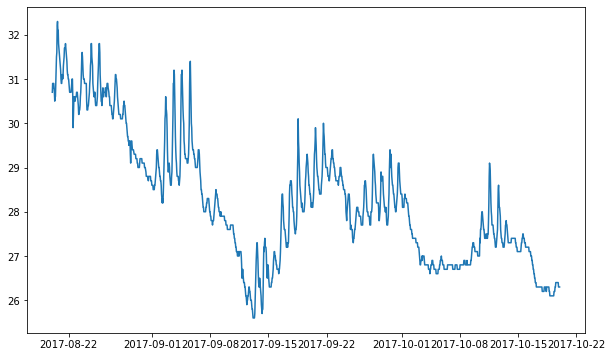

In [13]:
plt.figure(figsize = (10,6))
plt.plot(dates, df['Water_Temp(oC)']) #dates vs SST

#### Format x-ticks
Ok this looks pretty good but it's still difficult to read the date tick marks.

Let's rotate the date tick labels like we did in a previous lab, add axis labels, and add a title

7. Rotate the date ticks using plt.xticks(rotation = 45) # rotates by 45 degrees

8. Add x and y labels using plt.xlabel('') and plt.ylabel('')

9. Add a title with plt.title('')

Text(0.5, 1.0, 'SST Orange Beach Buoy')

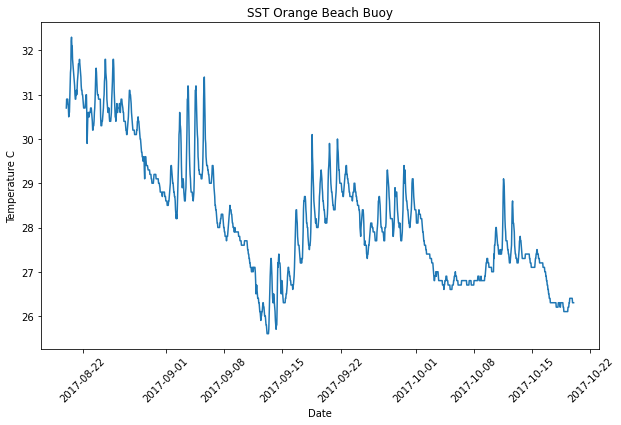

In [14]:
plt.figure(figsize = (10,6)) #create plot
plt.plot(dates,df['Water_Temp(oC)']) #plot dates vs SST
plt.xticks(rotation = 45) #rotate the label
plt.xlabel('Date') #add x-label
plt.ylabel('Temperature C') #add y-label
plt.title('SST Orange Beach Buoy') #add title

#### Assess our SST plot

Now let's assess SST at the Orange Beach Buoy over the date range we have plotted. 

10. What is the temperature range over the time period?

11. Locate major periods of decreasing temperature. For each of these periods, approximately what day did the cooling begin?

12. What might have caused these cooling periods?

13. Hurricanes are common storm events in the Gulf of Mexico. Did any pass through this area of near this area (let's say within a couple hundred miles) during this time period? Do any look coincident with changes in the temperature structure? You can use the internet to look up hurricane tracks. 

In [15]:
##10. About 5 degrees C (~31 to 26)

##11. 4-6 notable periods: ~8/26, ~9/5, ~9/22, ~10/1, ~10/17

##12. Any of these: advection/transport, mixing, surface heat fluxes

##13.Hurricane Harvey in late August, Irma around Sep 9, Nate around Oct 8. 
#Nate had little to no impact on SST but Harvey and Irma appear to have caused large drops in SST

## Exercise 4: (+) Heat fluxes - Incoming solar radiation (Qin)

#### Heat gain term

Now that we have assessed the SST, let's take a look at the heat flux term that is generally associated with heat gain to the ocean: incoming solar radiation (Qin)

1. Take another look at our data file. What is the column name for Qin?


In [16]:
##1. Solar_radiation(W/m^2)

#### Now let's plot Qin

2. Plot dates versus Qin using 

plt.figure(figsize = ( , ))

plt.plot(, )

*Hint you'll want to lengthen the figure size to get a better graph

3. Add a ylabel that includes units of Qin 

Text(0, 0.5, 'Qin (W/m^2)')

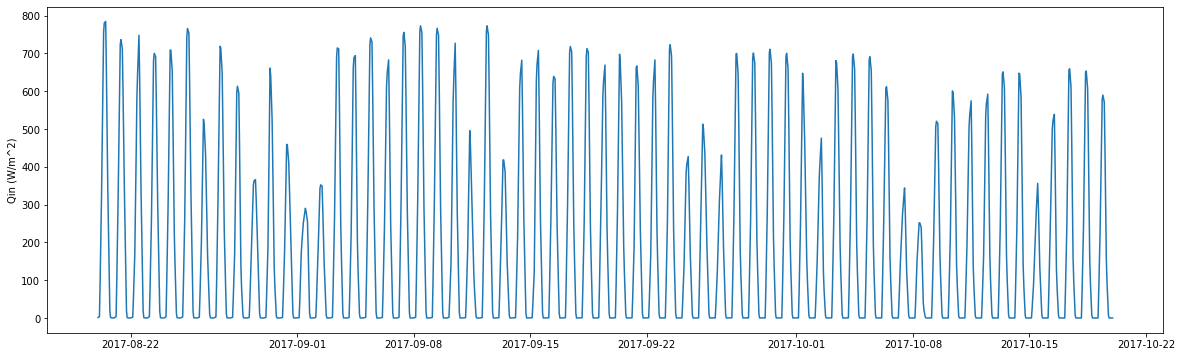

In [17]:
plt.figure(figsize = (20,6)) #create figure, make it big (20,6)
plt.plot(dates,df['Solar_radiation(W/m^2)'] ) #dates vs. Qin
plt.ylabel('Qin (W/m^2)') #set the y-label

#### Assess Qin
    
Let's take a look at our plot of Qin. Answer the following questions:

4. What are the units of Qin (spell out all abbreviations)?

5. What is the range of values for Qin?

6. What is the dominant pattern in this time series?

7. What is causing this pattern?

8. Why is there variability in the peaks?

9. Note that there is a subtle long-term trend over the two month period, with a ~100 W/m$^{2}$ decline in the peaks. Why is this happening? *Hint think about how the time series goes from August to October

In [18]:
##4. Watts per square meter

##5. Range between 0 - 800 W/m2

##6.Diurnal oscillation

##7. Day night cycle

##8. Cloudy days

##9. Seasons! Transition from summer to winter puts the Northern hemisphere further from the sun due to the Earth’s tilt. 

## Exercise 5: (-) Heat fluxes- Back radiation (Qb), sensible heat flux (Qh), latent heat flux (Qe)

#### Now let's take a look at the heat loss terms

Back radiation (Qb), sensible heat flux (Qh), latent heat flux (Qe) are generally associated with heat loss in the ocean.
Let's plot these terms and compare them to the heat gain term, Qin.

1. What is the column name for Qb?

2. What is the column name for Qh?

3. What is the column name for Qe?

4. Can we directly compare Qin, Qb, Qh, and Qe? Why? *Hint: units

In [19]:
##1. Back_Radiation(W/m^2)

##2. Sensible_Heat_Flux(W/m^2)

##3. Latent_Heat_Flux(W/m^2)

##4. Yes; they are the same units.

#### Plot all heat flux terms

Now let's plot all the heat terms together so we can easily compare them. 

5. Let's replot Qin in a subplot above the heat loss terms. We've done this for you below:

Text(0, 0.5, 'Qin (W/m^2)')

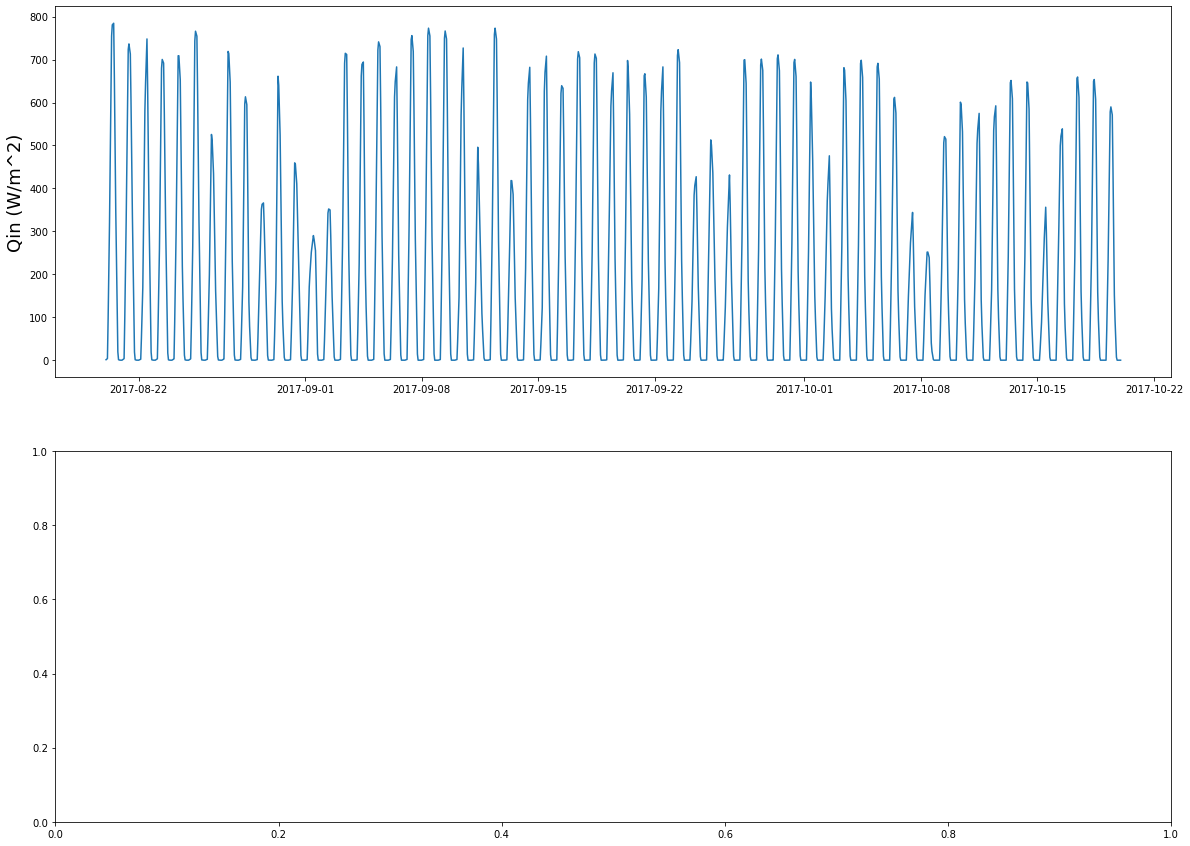

In [21]:
fig1, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 15)) #form two rows and one column (2,1) of subplots
ax1.plot(dates, df['Solar_radiation(W/m^2)']) # plot
ax1.set_ylabel('Qin (W/m^2)', fontsize=18) # y axis label, increase the font size


#### Plot Qb, Qe, and Qh on the 2nd subplot

6. Now plot Qb, Qe, and Qh together on the 2nd plot. *Hint: to plot multiple variables together, simply type as many ax.plot() commands as you need that refer to the same axis.
    
7. Label the y axis of the 2nd plot with the correct units.

8. Add a legend to the second plot, naming the heat loss terms as Qb, Qh, and Qe. Use the command ax2.legend(['', '', ''], prop={'size': 20}). Remember, the legend names will match with the terms by the order in which you plotted the terms. Make sure the legend is indicating the correct terms. The prop={'size': 20} parameter increases the font size of the legend. 

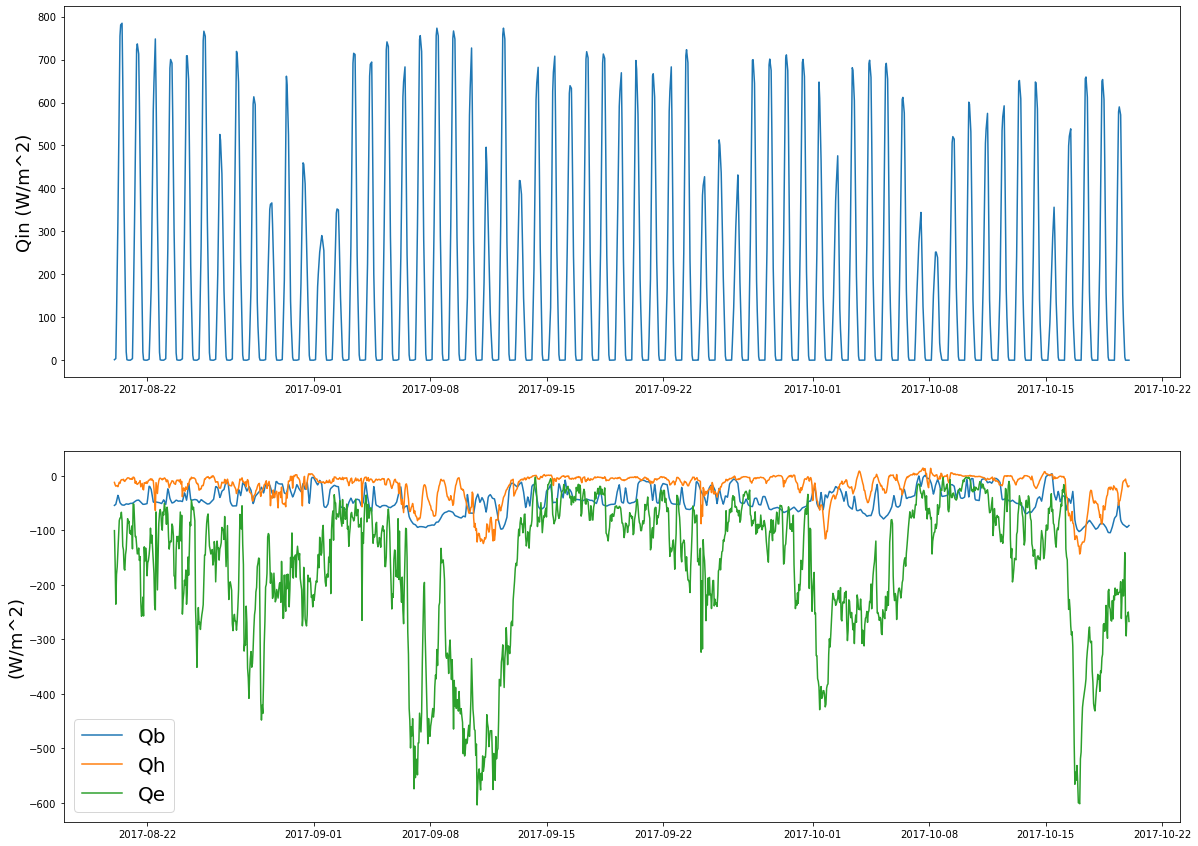

In [22]:
fig1, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 15))
ax1.plot(dates, df['Solar_radiation(W/m^2)']) # plot
ax1.set_ylabel('Qin (W/m^2)', fontsize=18) # y axis label

ax2.plot(dates, df['Back_Radiation(W/m^2)']) # Qb
ax2.plot(dates, df['Sensible_Heat_Flux(W/m^2)']) # Qh
ax2.plot(dates, df['Latent_Heat_Flux(W/m^2)']) # Qe
ax2.set_ylabel('(W/m^2)', fontsize=18) # y axis label
ax2.legend(['Qb', 'Qh', 'Qe'], prop={'size': 20})

#### Assess all Q terms

At this point, we should have nice plots of all our Q terms. Let's assess them.

9. How do the loss terms differ from the gain term? Please include differences in direction (positive or negative), magnitude, and patterns.

10. Qualitatively, what is the strongest heat loss term?

11. Compare the latent heat flux (Qe) with the SST plot. Are there any relationships that you see? Is this what you would expect?

In [23]:
##9. The are negative and weaker. The diurnal signal is much less obvious

##10. Qe

##11. Yes.  When the latent heat fluxes are large the water temperature typically cools. 
#Yes.  Heat loss through the surface of the ocean would be expected to cool the ocean.

## Exercise 6: Relative importance of terms in heat budget

We can use the plots to get an idea of the relative strengths of the different heat flux terms by comparing them to each other. But let's get a little more quantitative. 

#### Average strength of heat flux terms

Let's quantify the strength of each flux term by taking the average of the term over the time series. This will tell us, on average, the strength of each term. Remember we can use the .mean() command to get an average. 

1. On average, what is the strength of Qin?

2. On average, what is the strength of Qb?

3. On averge, what is the strength of Qh?

4. On average, what is the strength of Qe?


In [24]:
##1. 
Qin = df['Solar_radiation(W/m^2)'].mean()
Qin

203.11308264699443

In [25]:
##2. 
a = df['Back_Radiation(W/m^2)'].mean()
a

-44.55926572404373

In [26]:
##3.
b = df['Sensible_Heat_Flux(W/m^2)'].mean()
b

-18.69542348975407

In [27]:
##4. 
c = df['Latent_Heat_Flux(W/m^2)'].mean()
c

-168.68600150273224

#### Is the ocean gaining or losing heat?

Based on the average strengths you calculated above, would you expect the water column to be gaining or losing heat?

5. On average, how much heat is the water column gaining or losing? To calculate this, add together all your Q terms to yield Qt, the total heat flux. Show your calculations.

6. Is the heat gain or loss represented by Qt reflected in the SST we plotted earlier?

In [28]:
##5. The loss terms are greater than the gain term, resulting in an average heat loss of -20 W/m^2
Qout = a+b+c
Qt = Qin+Qout
Qt

-28.827608069535614

In [29]:
##6. Yes the sst gets lower. 

## Exercise 7: Are heat fluxes the only terms that control the ocean SST?

We've calculated the heat gain or heat loss of the ocean based on the surface heat fluxes. But are the changes in SST due just to heat fluxes?

#### Use change in heat content ($\Delta H$) equation to calculate change in temperature ($\Delta T$) due to heat fluxes
Let's take this step by step and examine the equation, below, that we can use to calculate how much the SST should have changed based soley on the heat fluxes. 

<center> $\frac{\Delta H}{\Delta T} = c_p* \rho* z* \frac{\Delta T}{\Delta t}$ </center>

#### The terms in the equation are:

$\Delta H$, the change in heat concent in Joules (J)/m$^{2}$

$\Delta T$, the change in temperature in degrees C

$c_p$, the heat capacity of water $\approx$ 4000 J/m$^{2}$

$\rho$, the average density of water $\approx$ 1000 kg/m$^{2}$

z, the water depth in meters

$\Delta t$, the change in time in seconds




#### We can substitute Qt for some of the terms in the equation. 

Qt = $\frac{\Delta H}{\Delta T}$

Therefore:

<center> Qt = $c_p* \rho *z* \frac{\Delta T}{\Delta t}$</center>


We have already calculated Qt in the last exercise! And the units of W/m$^{2}$ are what we need.

#### So if we rearrange the equation, then:

<center>$\frac{Qt * \Delta t}{c_p *\rho *z} = \Delta T$</center>

We have already defined the constants $c_p$ and $\rho$ above. 

#### And we know the rest of the terms too:

Qt = what you calculated in Exercise 6, Question 6

$\Delta t$ = 61 days (we'll need to convert this to seconds)

z = 26 meters 

#### <center>So now we can solve for $\Delta T$, the change in temperature. </center>

#### Write a function

Now we will introduce a powerful concept to help us calculate $\Delta T$: writing a function. A function is just a block of code that runs when you call it according to the inputs that you give it. We have been using functions this whole time, but our we haven't written our own yet.

Let's start with a simple example where "the Scholar" is added to any entered name:

In [30]:
# the start of the function is defined by "def"
# then name your function, this is what you will use to call the function. This function is called "my_function"
# now in the parenthesis, list the input(s) your function will need to operate
# lastly, indent and code what you want to function to do
# This function takes the input and adds "the Scholar" to it

def my_function(name): 
  print(name + " the Scholar")

In [31]:
# now call the function and type the input
# the input needs to be in quotes if its a string

my_function('Dr. L')

Dr. L the Scholar


#### Try it out

1. Now call my_function again with your own name as the input parameter

In [32]:
my_function('Lucifer') #my name could be Lucifer

Lucifer the Scholar


#### Let's write a function to calculate $\Delta T$

We'll call the function tempchange, and we will require the user to enter Qt in W/m$^{2}$, z in meters, and the $\Delta t$ in days. Note the code for the function is just the equation that we rearranged above. 

Run the code for the tempchange function below:

In [33]:
# write function to calculate change in temperature that receives the inputs Qt, z, and days
def tempchange (Qt, z, days):
    print(round((Qt*3600*24*days)/(4000*1000*z), 1), "degrees C")

#### What was $\Delta T$, the change in temperature due solely to heat fluxes?

Now we can easily calculate the change in temperature based on the heat fluxes we have been assessing for this assignment.

2. Call the tempchange function and type the values of the inputs needed to calculate the change in temp due to heat fluxes.

tempchange(Qt, z, days) <-- input the values for the terms in the parentheses

In [34]:
# Qt of -29, z of 26, 61 days
tempchange(-29,26,61)

-1.5 degrees C


#### How much did the heat fluxes affect SST?

3. Look back at your sst graph from Exercise 3. Is the temperature change from the heat fluxes consistent with how much the SST actually changed? If not, why?

4. How would the change in temperature be affected if the water column were shallower? Use 5 meters for z instead of 26 meters.

5. What about if the water column were 100 meters?

6. How does depth affect changes in temperature? What are the implications for the coastal ocean?

In [35]:
##3. No. The decrease of of temp was around 5 degrees C this only accounted for 1.5. Cooler water mixing from bottom

In [36]:
##4. 
tempchange(-29,5,61)

-7.6 degrees C


In [37]:
##5. 
tempchange(-29,100,61)

-0.4 degrees C


In [38]:
##6. Shallower areas cool faster than deeper areas and experience more extreme temperature changes.

## <center> That's all folks!
   </center>


We've discussed and understand the relationships between oceanographic and atmospheric data.

We've plotted sea surface temperature and heat fluxes.

We've also calculated how much of the change in SST is due to heat fluxes by writing our own function.

And we've assessed the importance of heat fluxes in an ocean temperature budget. 

## <center> Great job!
   </center>
